<a href="https://colab.research.google.com/github/abdullah1234-bit/NLP-/blob/main/bag_of_n_grams_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Bag of n_grams: Task

- Fake news refers to misinformation or disinformation in the country which is spread through word of mouth and more recently through digital communication such as What's app messages, social media posts, etc.

- Fake news spreads faster than Real news and creates problems and fear among groups and in society.

- We are going to address these problems using classical NLP techniques and going to classify whether a given message/ text is **Real or Fake Message**.

- You will use a Bag of n-grams to pre-process the text and apply different classification algorithms.

- Sklearn CountVectorizer has the inbuilt implementations for Bag of Words.


### **About Data: Fake News Detection**

Credits: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset


- This data consists of two columns.
        - Text
        - label
- Text is the statements or messages regarding a particular event/situation.

- label feature tells whether the given Text is Fake or Real.

- As there are only 2 classes, this problem comes under the **Binary Classification.**


In [3]:
# Import pandas library
import pandas as pd

# Read the dataset with the name "Fake_Real_Data.csv" and store it in a variable df
df = pd.read_csv("/content/Fake.csv")
df = pd.read_csv("/content/True.csv")
# Print the shape of the dataframe
print("Shape of the dataframe:", df.shape)

# Print the top 5 rows of the dataframe
print("Top 5 rows of the dataframe:")
print(df.head())



Shape of the dataframe: (21417, 4)
Top 5 rows of the dataframe:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   


In [5]:
print(df.columns)


Index(['title', 'text', 'subject', 'date'], dtype='object')


In [6]:
# Check the distribution of labels
print("Distribution of labels:")
print(df['subject'].value_counts())



Distribution of labels:
subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64


In [7]:
# Create a mapping of labels to numbers
label_mapping = {'politicsNews': 0, 'worldnews': 1}

# Add the new column "label_num"
df['label_num'] = df['subject'].map(label_mapping)

# Check the results with top 5 rows
print(df.head())


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  label_num  
0  December 31, 2017           0  
1  December 29, 2017           0  
2  December 31, 2017           0  
3  December 30, 2017           0  
4  December 29, 2017           0  


### **Modelling without Pre-processing Text data**

In [8]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Perform train-test split with stratified sampling
X = df['text']  # Feature (text data)
y = df['label_num']  # Target labels (numeric labels)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=2022,
    stratify=y  # Ensures stratified sampling
)

# Check the distribution of labels in train and test sets
print("Train set label distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set label distribution:")
print(y_test.value_counts(normalize=True))




Train set label distribution:
label_num
0    0.526294
1    0.473706
Name: proportion, dtype: float64

Test set label distribution:
label_num
0    0.526377
1    0.473623
Name: proportion, dtype: float64


In [9]:

# Print the shapes of X_train and X_test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)



Shape of X_train: (17133,)
Shape of X_test: (4284,)


**Attempt 1** :

1. using sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, bigram, and trigrams.
- use KNN as the classifier with n_neighbors of 10 and metric as 'euclidean' distance.
- print the classification report.


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Create a pipeline with CountVectorizer and KNN classifier
pipeline = Pipeline([
    # Unigram, bigram, and trigram
    ('vectorizer 1', CountVectorizer(ngram_range=(1, 3))),  # You can adjust the range as needed
    ('knn', KNeighborsClassifier(n_neighbors=10, metric='euclidean'))
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2255
           1       0.86      0.79      0.82      2029

    accuracy                           0.84      4284
   macro avg       0.84      0.83      0.84      4284
weighted avg       0.84      0.84      0.84      4284



**Attempt 2** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with unigram, bigram, and trigrams.
- use **KNN** as the classifier with n_neighbors of 10 and metric as 'cosine' distance.
- print the classification report.


In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Create a pipeline with CountVectorizer and KNN classifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 1))),          #trigram
    ('knn', KNeighborsClassifier(n_neighbors=10, metric='cosine'))  # KNN with cosine similarity
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2255
           1       0.92      0.90      0.91      2029

    accuracy                           0.92      4284
   macro avg       0.92      0.91      0.92      4284
weighted avg       0.92      0.92      0.92      4284




**Attempt 3** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Create a pipeline with CountVectorizer for trigrams and RandomForest classifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 1))),  # n grams only
    ('rf', RandomForestClassifier(random_state=42))  # RandomForest classifier
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



KeyboardInterrupt: 


**Attempt 4** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with both unigram and bigrams.
- use **Multinomial Naive Bayes** as the classifier with an alpha value of 0.75.
- print the classification report.


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Create a pipeline with CountVectorizer for unigrams and bigrams, and Multinomial Naive Bayes
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),  # Unigrams and bigrams
    ('nb', MultinomialNB(alpha=0.75))  # Multinomial Naive Bayes with alpha=0.75
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2255
           1       0.91      0.95      0.93      2029

    accuracy                           0.93      4284
   macro avg       0.93      0.93      0.93      4284
weighted avg       0.93      0.93      0.93      4284



<h3>Use text pre-processing to remove stop words, punctuations and apply lemmatization </h3>

In [20]:
#use this utility function to get the preprocessed text data

import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [21]:
# Assuming preprocess is your utility function for cleaning the text
def preprocess(text):
    doc = nlp(text)  # Assuming 'nlp' is your pre-trained spaCy model
    no_stop_words = [token.text for token in doc if not token.is_stop]
    return " ".join(no_stop_words)

# Apply the preprocess function to each row of the 'text' column and store it in 'preprocessed_txt'
df['preprocessed_txt'] = df['text'].apply(preprocess)

# Check the top 5 rows to verify the new column
print(df[['text', 'preprocessed_txt']].head())


                                                text  \
0  WASHINGTON (Reuters) - The head of a conservat...   
1  WASHINGTON (Reuters) - Transgender people will...   
2  WASHINGTON (Reuters) - The special counsel inv...   
3  WASHINGTON (Reuters) - Trump campaign adviser ...   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...   

                                    preprocessed_txt  
0  WASHINGTON ( Reuters ) - head conservative Rep...  
1  WASHINGTON ( Reuters ) - Transgender people al...  
2  WASHINGTON ( Reuters ) - special counsel inves...  
3  WASHINGTON ( Reuters ) - Trump campaign advise...  
4  SEATTLE / WASHINGTON ( Reuters ) - President D...  


In [22]:
# Print the top 5 rows to verify the new column
print(df[['text', 'preprocessed_txt']].head())



                                                text  \
0  WASHINGTON (Reuters) - The head of a conservat...   
1  WASHINGTON (Reuters) - Transgender people will...   
2  WASHINGTON (Reuters) - The special counsel inv...   
3  WASHINGTON (Reuters) - Trump campaign adviser ...   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...   

                                    preprocessed_txt  
0  WASHINGTON ( Reuters ) - head conservative Rep...  
1  WASHINGTON ( Reuters ) - Transgender people al...  
2  WASHINGTON ( Reuters ) - special counsel inves...  
3  WASHINGTON ( Reuters ) - Trump campaign advise...  
4  SEATTLE / WASHINGTON ( Reuters ) - President D...  


**Build a model with pre processed text**

In [23]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split

# Step 2: Prepare the feature and target columns
# 'preprocessed_txt' contains the cleaned text
X = df['preprocessed_txt']
# 'label_num' is the target label for classification
y = df['label_num']

# Step 3: Split the data into training and testing sets
# Test size is 20%, random_state for reproducibility, stratify to ensure label distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022, stratify=y)

# Step 4: Check the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)




Shape of X_train: (17133,)
Shape of X_test: (4284,)
Shape of y_train: (17133,)
Shape of y_test: (4284,)


**Let's check the scores with our best model till now**
- Random Forest

**Attempt1** :

1. using the sklearn pipeline module create a classification pipeline to classify the Data.

**Note:**
- using CountVectorizer with only trigrams.
- use **RandomForest** as the classifier.
- print the classification report.


In [24]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data (assuming the data is already preprocessed in 'preprocessed_txt' column)
X = df['preprocessed_txt']
y = df['label_num']

# Train-test splitting with 20% test size, stratify, and random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022, stratify=y)

# Create the pipeline with CountVectorizer (using trigrams) and RandomForestClassifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 1))),
    ('classifier', RandomForestClassifier(random_state=42))  # RandomForestClassifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2255
           1       0.92      0.93      0.93      2029

    accuracy                           0.93      4284
   macro avg       0.93      0.93      0.93      4284
weighted avg       0.93      0.93      0.93      4284



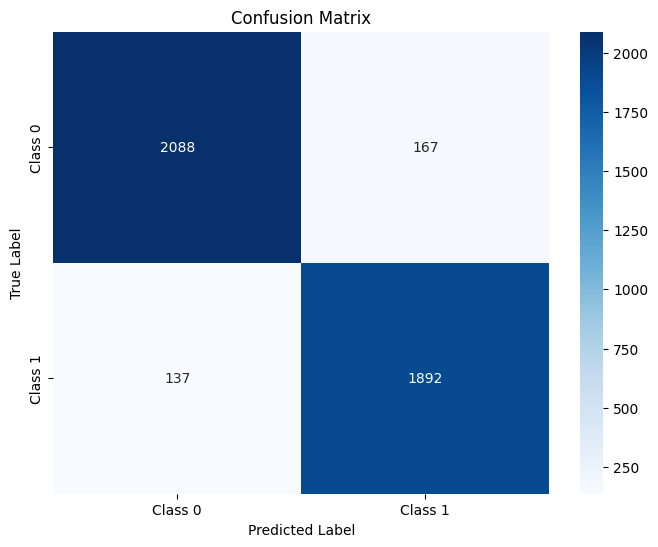

In [25]:
# Import necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix for the predictions
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


